#### **Intern Name - Fahim Ansari**
#### **Task 2 - Prediction using Unsupervised Learning**
#### **Internship Name - Data Science and Business Analytics**
#### **Internship Provider - The Sparks Foundation**
#### **Program - TSF GRIP (Graduate Rotational Internship Program)**

**Importing the Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import os
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

**Importing the Data from CSV file**

In [ ]:
dataf = pd.read_csv("Iris.csv")
print("Data Imported Successfully")

Data Imported Successfully


**Show the Data of first 5 Rows**

In [ ]:
dataf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Show the details of the Data**

In [ ]:
dataf.info()

NameError: name 'dataf' is not defined

**Check the size of the Data**

In [ ]:
dataf.shape

(150, 6)

**Cleaning the Data / Removing unwanted and extra Columns**

In [ ]:
dataf.drop("Id", axis = 1, inplace = True)

In [ ]:
dataf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataf.shape

(150, 5)

In [ ]:
dataf.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Check the missing values**

In [ ]:
dataf.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Check the duplicate values**

In [ ]:
dataf.duplicated().sum()

3

**Duplicate values are 3, so remove those values**

In [ ]:
dataf = dataf.drop_duplicates(subset = None, keep = 'first', inplace = False, ignore_index = False)
dataf.shape

(147, 5)

**Data Visualization for the flower name Iris**

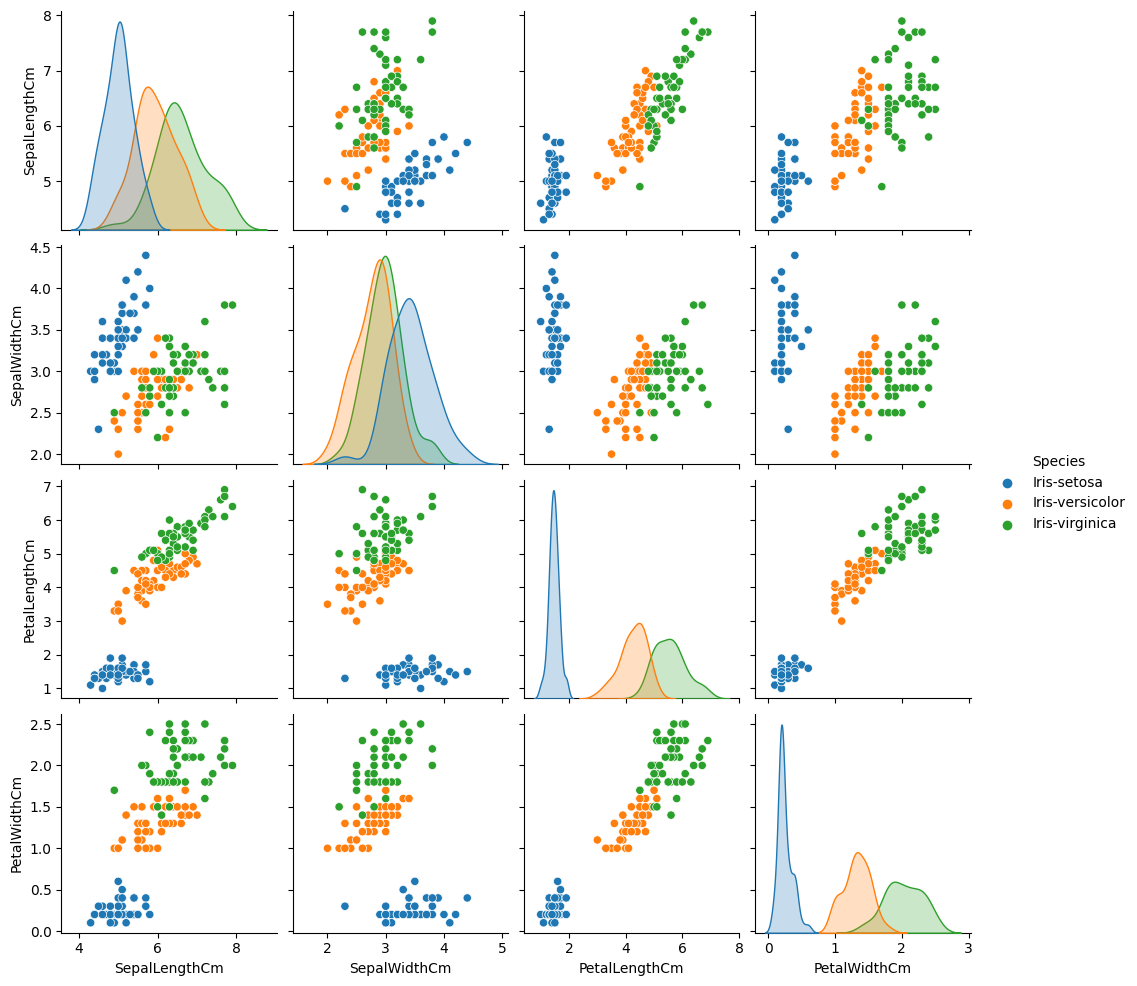

In [ ]:
sns.pairplot(data = dataf , hue = 'Species')
plt.show()

**Showing the unique values from the 'SepalLengthCm' column using Histogram**

<AxesSubplot: >

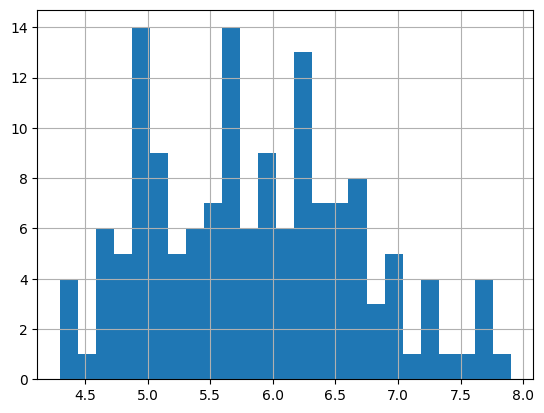

In [ ]:
dataf['SepalLengthCm'].hist(bins = 25)

**Showing the unique values from the 'SepalWidthCm' column using Histogram**

<AxesSubplot: >

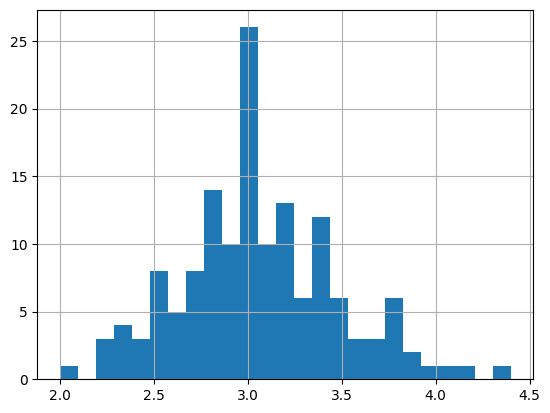

In [ ]:
dataf['SepalWidthCm'].hist(bins = 25)

**Showing the unique values from the 'PetalLengthCm' column using Histogram**

<AxesSubplot: >

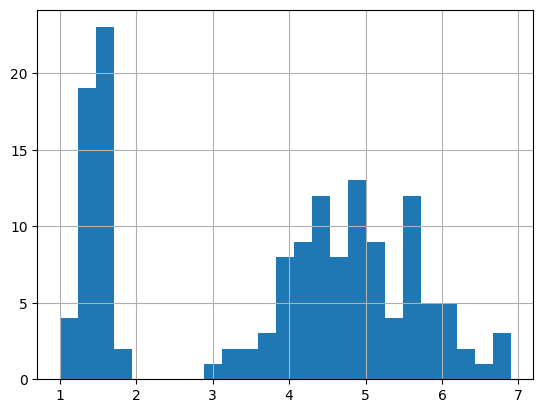

In [ ]:
dataf['PetalLengthCm'].hist(bins = 25)

**Showing the unique values from the 'PetalWidthCm' column using Histogram**

<AxesSubplot: >

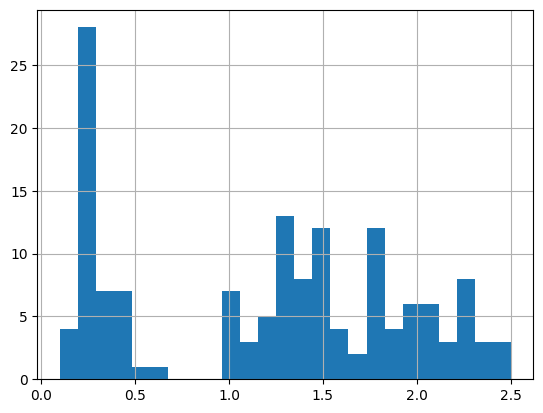

In [ ]:
dataf['PetalWidthCm'].hist(bins = 25)

**Creating the X features**

In [ ]:
x = dataf.iloc[:, [0, 1, 2 ,3]].values
x 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

**Finding optimum number of Clusters using Elbow Method**

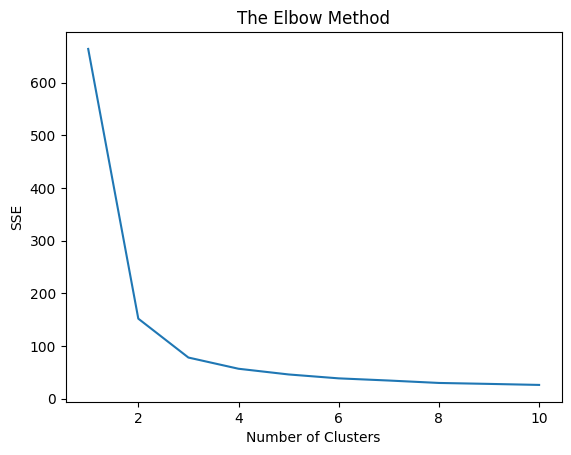

In [ ]:
data = dataf.iloc[:, :-1].values

sse = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300).fit(data)

    sse[i] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.title("The Elbow Method")    
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Applying kmeans to the Dataset / Creating the kmeans Classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)

**Visualizing the clusters - On the first two columns (SepalLength and SepalWidth)**

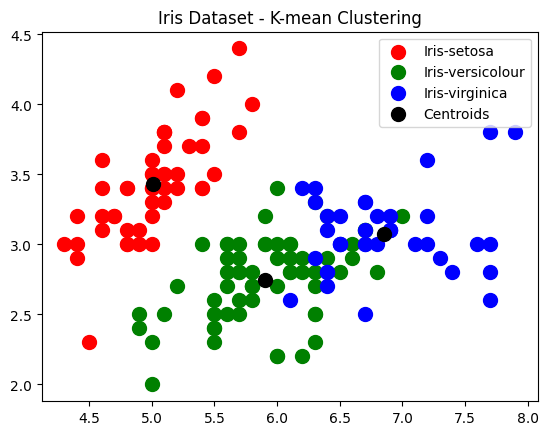

In [ ]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title("Iris Dataset - K-mean Clustering")
plt.legend()
plt.show()